# Comparing EM with GD for Gaussian mixtures (initialized from a one-cluster point)

In [15]:
## choosing parameters for mixture of gaussians
import numpy as np
m = n = 2
gPi = np.random.rand(m)
gPi = gPi / np.sum(gPi)
gMu = np.random.rand(m, n)
gMu[1] = -gMu[0]

In [16]:
print("gPi: ", gPi)
print("gMu: ", gMu)

gPi:  [0.63326719 0.36673281]
gMu:  [[ 0.51034649  0.50851715]
 [-0.51034649 -0.50851715]]


In [17]:
# choosing the number of samples
samples = 10000
data = np.zeros((samples, 2))
# sampling from the generating distribution
for _ in range(samples):
    t = np.random.rand()
    if t < gPi[0]:
        data[_] = np.random.multivariate_normal(gMu[0], np.eye(n), 1)
    else:
        data[_] = np.random.multivariate_normal(gMu[1], np.eye(n), 1)

In [18]:
# def a multivariate gaussian with identity covariance
def gaussian(x, y, n):
    result = 1.0
    for _ in range(n):
        result *= np.exp(-(x[_] - y[_])**2/2.0)
    return result

In [19]:
# def a mixture of Gaussians
def gmm(pi, Mu, x, m, n):
    result = 0.0
    for _ in range(m):
       result += pi[_] * gaussian(x, Mu[_], n)  
    return result

In [20]:
# initial parameters
iPi = np.array([0.0001, 0.9999])
iMu = (np.random.rand(m, n) * 2 - 1)
# running parameters
Pi = np.copy(iPi)
Mu = np.copy(iMu)

## EM algorithm

In [21]:
# number of iterations
iteration = 100 
loss = np.zeros(iteration)
pis = np.zeros(iteration)
# Zc is the partition function vector
for itts in range(iteration):
    # compute Z_c and E_{q_c}[x]
    Zc = np.zeros(m)
    Zcx = np.zeros((m, n))
    for c in range(m):
        for i in range(samples):
            x = data[i]
            Zcx[c] += np.multiply(x, (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n)))
            Zc[c] += (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n))
    Zc /= samples
    Zcx /= samples
    # update parameters
    print("Zc: ", Zc, "Pi: ", Pi)
    for _ in range(m):
        Pi[_] *= Zc[_]
        Mu[_] = Zcx[_] / Zc[_]
    pis[itts] = Pi[0]
    cross_entropy = 0.0
    for i in range(samples):
        x = data[i]
        cross_entropy += -np.log(gmm(Pi, Mu, x, m, n))
    cross_entropy /= samples
    loss[itts] = cross_entropy

Zc:  [1.27210757 0.99997279] Pi:  [1.000e-04 9.999e-01]
Zc:  [1.00682883 0.99999913] Pi:  [1.27210757e-04 9.99872789e-01]
Zc:  [1.01351909 0.99999827] Pi:  [1.28079457e-04 9.99871921e-01]
Zc:  [1.02908375 0.99999622] Pi:  [1.29810975e-04 9.99870189e-01]
Zc:  [1.06596508 0.99999119] Pi:  [1.33586364e-04 9.99866414e-01]
Zc:  [1.15533875 0.99997788] Pi:  [1.42398400e-04 9.99857602e-01]
Zc:  [1.37828489 0.99993775] Pi:  [1.64518389e-04 9.99835482e-01]
Zc:  [1.94466354 0.99978575] Pi:  [2.26753211e-04 9.99773247e-01]
Zc:  [2.7866785 0.9992118] Pi:  [4.40958702e-04 9.99559041e-01]
Zc:  [2.44685048 0.99821991] Pi:  [0.00122881 0.99877119]
Zc:  [1.93102705 0.99719223] Pi:  [0.00300671 0.99699329]
Zc:  [1.70112627 0.99590545] Pi:  [0.00580605 0.99419395]
Zc:  [1.55536947 0.99446   ] Pi:  [0.00987682 0.99012318]
Zc:  [1.4422923  0.99309945] Pi:  [0.0153621 0.9846379]
Zc:  [1.35380684 0.9919832 ] Pi:  [0.02215664 0.97784336]
Zc:  [1.28592954 0.99115809] Pi:  [0.02999582 0.97000418]
Zc:  [1.234328

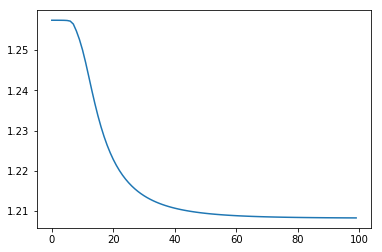

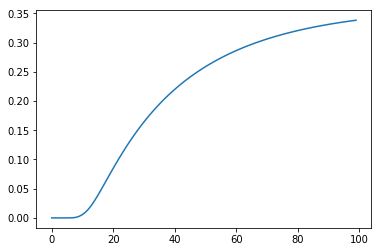

In [23]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.plot(loss)
plt.show()
plt.plot(pis)
plt.show()## EM algorithm

## GD algorithm

In [24]:
avg = np.mean(data, axis = 0)

In [25]:
import nbm
# go back to the same initialization
Pi = np.copy(iPi)
Mu = np.copy(iMu)
Mu[1] = avg
# set the step size
ss = 0.01
# number of iterations
iteration = 100
loss_gd = np.zeros(iteration)
pis_gd = np.zeros(iteration)
# Zc is the partition function vector
for itts in range(iteration):
    # compute Z_c and E_{q_c}[x]
    # the computations for Zc, Zcx are the same
    oldPi = np.copy(Pi)
    oldMu = np.copy(Mu)
    Zc = np.zeros(m)
    Zcx = np.zeros((m, n))
    for c in range(m):
        for i in range(samples):
            x = data[i]
            Zcx[c] += np.multiply(x, (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n)))
            Zc[c] += (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n))
    Zc /= samples
    Zcx /= samples
    # the only difference is in updating parameters
    for _ in range(m):
        Pi[_] += ss * Zc[_]
        Mu[_] += ss * oldPi[_] * ( (Zcx[_] / Zc[_]) - oldMu[_]) * Zc[_]
    # do the projection, no need to project Mu now
    Pi = nbm.project(Pi)
    # print (use it for debugging)
    print("Zc: ", Zc, "Pi: ", Pi)
    pis_gd[itts] = Pi[0]
    cross_entropy = 0.0
    for i in range(samples):
        x = data[i]
        cross_entropy += -np.log(gmm(Pi, Mu, x, m, n))
    cross_entropy /= samples
    loss_gd[itts] = cross_entropy

Zc:  [1.2458 1.    ] Pi:  [0.0013 0.9987]
Zc:  [1.2404 0.9997] Pi:  [0.0025 0.9975]
Zc:  [1.2354 0.9994] Pi:  [0.0037 0.9963]
Zc:  [1.2307 0.9991] Pi:  [0.0049 0.9951]
Zc:  [1.2263 0.9989] Pi:  [0.006 0.994]
Zc:  [1.222  0.9987] Pi:  [0.0071 0.9929]
Zc:  [1.218  0.9984] Pi:  [0.0082 0.9918]
Zc:  [1.2142 0.9982] Pi:  [0.0093 0.9907]
Zc:  [1.2106 0.998 ] Pi:  [0.0104 0.9896]
Zc:  [1.2071 0.9978] Pi:  [0.0114 0.9886]
Zc:  [1.2038 0.9976] Pi:  [0.0124 0.9876]
Zc:  [1.2006 0.9975] Pi:  [0.0135 0.9865]
Zc:  [1.1975 0.9973] Pi:  [0.0145 0.9855]
Zc:  [1.1946 0.9971] Pi:  [0.0154 0.9846]
Zc:  [1.1917 0.997 ] Pi:  [0.0164 0.9836]
Zc:  [1.189  0.9968] Pi:  [0.0174 0.9826]
Zc:  [1.1864 0.9967] Pi:  [0.0183 0.9817]
Zc:  [1.1839 0.9966] Pi:  [0.0193 0.9807]
Zc:  [1.1815 0.9964] Pi:  [0.0202 0.9798]
Zc:  [1.1791 0.9963] Pi:  [0.0211 0.9789]
Zc:  [1.1768 0.9962] Pi:  [0.022 0.978]
Zc:  [1.1746 0.9961] Pi:  [0.0229 0.9771]
Zc:  [1.1725 0.996 ] Pi:  [0.0238 0.9762]
Zc:  [1.1705 0.9958] Pi:  [0.0247 0.97

## Comparing the escape rate for EM and GD

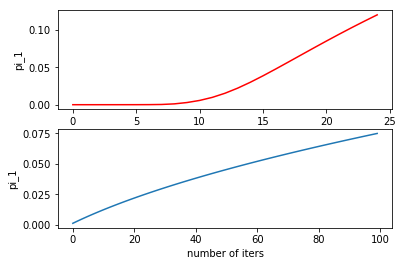

In [32]:
plt.subplot(211)
plt.xlabel("number of iters")
plt.ylabel("pi_1")
plt.plot(pis[:25], 'r')
plt.subplot(212)
plt.plot(pis_gd)
plt.xlabel("number of iters")
plt.ylabel("pi_1")
plt.savefig('em_vs_gd_gmm.png')
plt.show()## EM algorithm